# Final Assignment 52002/52019 - 2023-24 - Part 1 BigQuery & SQL [35 pts]


BigQuery is Google's serverless data warehouse that enables scalable analysis   
over petabytes of data. It is a Platform as a Service (PaaS) that supports querying   
using SQL. In this part of the midterm you'll be asked to query BigQuery tables    
using its python API. Please use the `sandbox` BigQuery environment and query   
only public datasets.

**Grading:**
There are seven subquestions in this part. Each subquestion in this part is worth **5** points for the final work grade.

**Please note:**
Your BigQuery's resources are limited to 1 TB per user per month - be mindful with how many queries you   
execute and try to optimize your queries as much as possible.


**Guidelines:**  
1. Fill this notebook with python commands including SQL queries in the designated places,  
 run it using a jupyter notebook environment (e.g. google colab), save the resulting   
 ipynb file with the results before submitting.
2. Please write efficient SQL queries and code. Points may be taken off for     
    inefficient queries and code.
3. The python API enables us to write code that interacts with BigQuery and convert   
between the SQL tables to python objects, thus allowing analysis and plotting using   
python code. You should write your SQL commands within the API. It is recommended to   
browse the dataset in the BigQuery web-browser, and try running your SQL command  
 there before copying it to the python notebool.      
4. Please only use the method `dataframe.plot.[kind]()` to create visuzalizations,   
where `[kind]` refers to the type of plot that you want to use.
   In addition, your plots should be clear, with titles, and with propoer x-y labels.
5. When reading BigQuery tables, used the `` symbols to around the table's name.  
6. Please make sure yout figures are legible/readible.    
7. You can use the sample `bigquery_sample_python_notebook` for some query examples.   


FOR SUBMISSION:
PLEASE SUBMIT THE FOLLOWING:
1. Your fully executed IPYNB file (with the expected output)
2. A PDF/HTML import of your executed IPYNB file (with the expected output)

SUBMISSIONS WITHOUT OUTPUTS WILL NOT BE GRADED!!

Requirements:
- `google-cloud` client library + `google-cloud-bigquery`    
  (https://cloud.google.com/python/docs/reference/bigquery/latest)
- Google Cloud authentication:
  In your linux shell , execute:   
  `gloud init` and then also
  `gcloud auth application-default login` and  follow instructions.

**Necessary Libraries:**  
(Do not use any libraries that are not in this list without permission form the course staff)

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd
import matplotlib as plt
from google.cloud import bigquery
from sqlite3 import connect

In [ ]:
# Construct a BigQuery client
my_project_name = "bigdata-mining-423313" # fill in your project's name
client = bigquery.Client(project=my_project_name)

San Francisco datasets

In [ ]:
san_fan_films_locs = "bigquery-public-data.san_francisco.film_locations"
san_fan_service_reqs = "bigquery-public-data.san_francisco.311_service_requests"
san_fan_pd_incidents = "bigquery-public-data.san_francisco.sfpd_incidents"
san_fan_fd_incidents = "bigquery-public-data.san_francisco.sffd_service_calls"

### Q1) Basic Usage

Q1.a) Execute a query that select 1000 rows from `bigquery-public-data.san_francisco.film_locations`,    
then saves the results using the `.results()` method. Finally print the first 2 rows.

SOLUTION:

In [ ]:
# Insert query below between the two triple-parenthesis
QUERY = ("""SELECT *
FROM `bigquery-public-data.san_francisco.film_locations`
LIMIT 1000;
 """.format(san_fan_films_locs))
query_job_1a = client.query(QUERY)  # API request
results_1a = query_job_1a.result()  # Waits for query to finish

df = results_1a.to_dataframe()
print(df.head(2))


                title  release_year                locations  \
0  A Jitney Elopement          1915  20th and Folsom Streets   
1  A Jitney Elopement          1915         Golden Gate Park   

                                           fun_facts  \
0                                                      
1  During San Francisco's Gold Rush era, the Park...   

                       production_company           distributor  \
0  The Essanay Film Manufacturing Company  General Film Company   
1  The Essanay Film Manufacturing Company  General Film Company   

          director           writer          actor_1         actor_2 actor_3  
0  Charles Chaplin  Charles Chaplin  Charles Chaplin  Edna Purviance          
1  Charles Chaplin  Charles Chaplin  Charles Chaplin  Edna Purviance          


Q1.b) Using the saved results object from the query in (1.a), load the results  
into a pandas DataFrame.
Hint: you can retrieve the header using `query.result().schema`.  
Print the first 5 rows of the dataframe.

SOLUTION:

In [ ]:
print(df.head(5))

                title  release_year                locations  \
0  A Jitney Elopement          1915  20th and Folsom Streets   
1  A Jitney Elopement          1915         Golden Gate Park   
2       San Francisco          1936        The Barbary Coast   
3       San Francisco          1936                City Hall   
4  After the Thin Man          1936               Coit Tower   

                                           fun_facts  \
0                                                      
1  During San Francisco's Gold Rush era, the Park...   
2  The Barbary Coast was a red-light district tha...   
3  The dome of SF's City Hall is almost a foot ta...   
4  The Tower was funded by a gift bequeathed by L...   

                       production_company           distributor  \
0  The Essanay Film Manufacturing Company  General Film Company   
1  The Essanay Film Manufacturing Company  General Film Company   
2                     Metro-Goldwyn Mayer   Metro-Goldwyn Mayer   
3         

Q1.c) Query the table to get the number of total distinct films that were filmed in San Francisco in each year in a decreasing order (by year).  
Using the method `.plot` on a dataframe, display the results visually (you do not need to print the output table of the query itself).   
What was the year with most films released?


SOLUTION:

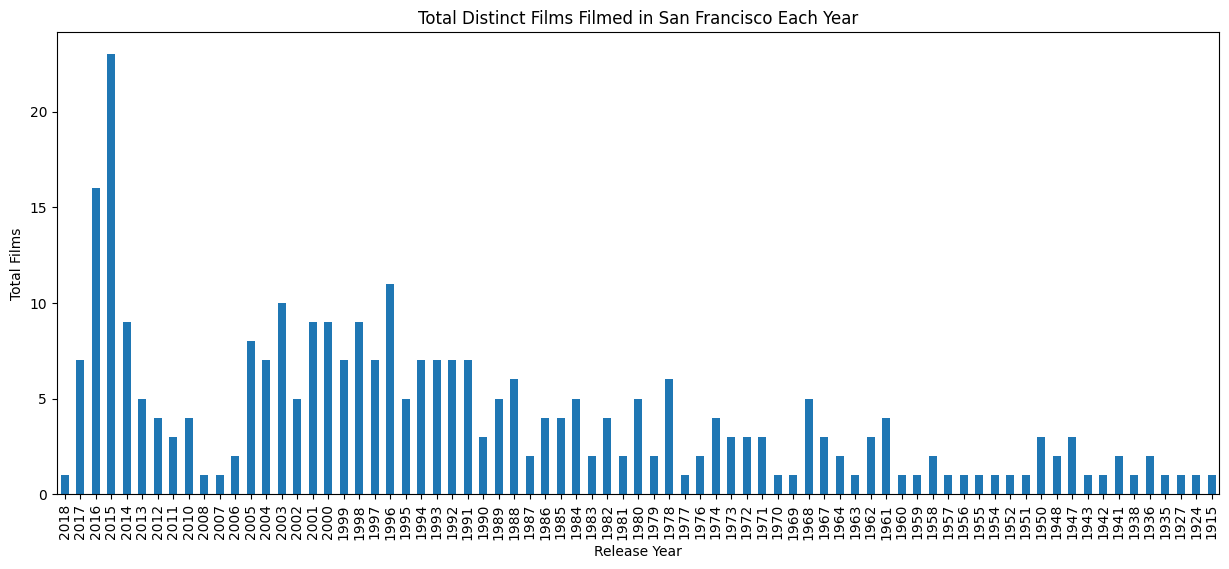

In [ ]:
# Insert query below between the two triple-parenthesis
QUERY = ("""SELECT release_year, COUNT(DISTINCT title) AS total_films
FROM `bigquery-public-data.san_francisco.film_locations`
GROUP BY release_year
ORDER BY release_year DESC;
    """.format(san_fan_films_locs))
query_job_1c = client.query(QUERY)  # API request
results_1c = query_job_1c.result()  # Waits for query to finish
df = results_1c.to_dataframe()

ax = df.plot(kind='bar', x='release_year', y='total_films', figsize=(15, 6), legend=False)
ax.set_title('Total Distinct Films Filmed in San Francisco Each Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Total Films')
plt.pyplot.show()

Q1.d) Query the table to get the most popular filming locations.  
Using the method `.plot` on a dataframe, display the results visually, with the top-20 locations sorted by popularity.   


SOLUTION:

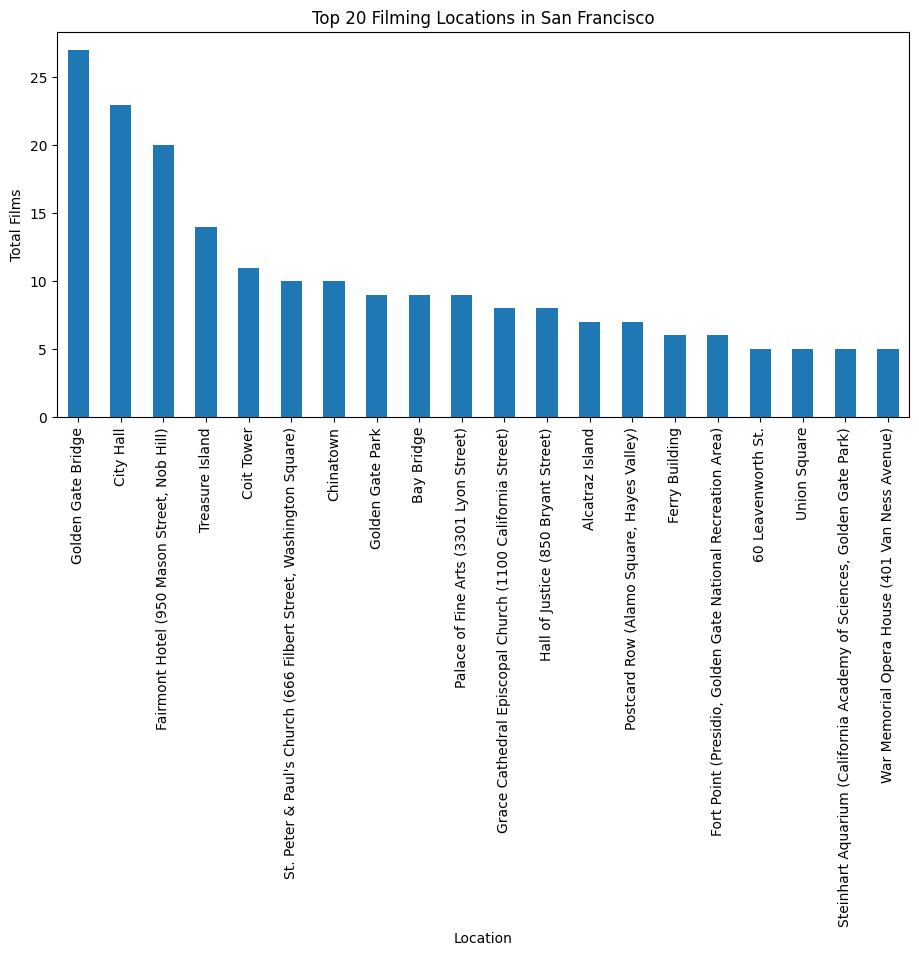

In [ ]:
QUERY = ("""SELECT locations, COUNT(locations) AS total_films
FROM `bigquery-public-data.san_francisco.film_locations`
WHERE locations IS NOT NULL AND locations != ''
GROUP BY locations
ORDER BY total_films DESC
LIMIT 20;
    """.format(san_fan_films_locs))
query_job_1d = client.query(QUERY)  # API request
results_1d = query_job_1d.result()  # Waits for query to finish
df = results_1d.to_dataframe()
ax = df.plot(kind='bar', x='locations', y='total_films', figsize=(11, 5), legend=False)
ax.set_title('Top 20 Filming Locations in San Francisco')
ax.set_xlabel('Location')
ax.set_ylabel('Total Films')
plt.pyplot.show()

### Q2) San Francisco Police and Fire Department calls/incidents

Q2.a) For the `san_fan_pd_incidents` table
write a query that returns the most common `category` for each `weekday`.  Print the resulting table with one row per day of the week.   
Hint: there are many ways to achieve it, it is recommended to simplify the query     
using `WITH` table and a window function.

In [ ]:
QUERY = ("""WITH most_common AS (
  SELECT
    dayofweek,
    category,
    ROW_NUMBER() OVER(PARTITION BY dayofweek ORDER BY COUNT(*) DESC) AS rank
  FROM `bigquery-public-data.san_francisco.sfpd_incidents`
  GROUP BY dayofweek, category
)
SELECT
  dayofweek,
  category
FROM most_common
WHERE rank = 1;
    """.format(san_fan_pd_incidents))
query_job_2a = client.query(QUERY)  # API request
results_2a = query_job_2a.result()  # Waits for query to finish
df = pd.DataFrame(results_2a)
print(df)

                            0
0     (Monday, LARCENY/THEFT)
1   (Saturday, LARCENY/THEFT)
2    (Tuesday, LARCENY/THEFT)
3     (Sunday, LARCENY/THEFT)
4  (Wednesday, LARCENY/THEFT)
5     (Friday, LARCENY/THEFT)
6   (Thursday, LARCENY/THEFT)


Q2.b) Repeat Q2.a for the  `san_fan_fd_incidents` table, but this time for `call_type`.  
Hint: you need to retrieve the day of week first. You may use the CASE command

In [ ]:
QUERY = ("""WITH day_of_week_calls AS (
  SELECT
    EXTRACT(DAYOFWEEK FROM call_date) AS day_of_week,
    call_type
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls`
)
, ranked_calls AS (
  SELECT
    CASE
      WHEN day_of_week = 1 THEN 'Sunday'
      WHEN day_of_week = 2 THEN 'Monday'
      WHEN day_of_week = 3 THEN 'Tuesday'
      WHEN day_of_week = 4 THEN 'Wednesday'
      WHEN day_of_week = 5 THEN 'Thursday'
      WHEN day_of_week = 6 THEN 'Friday'
      WHEN day_of_week = 7 THEN 'Saturday'
    END AS day_of_week_name,
    call_type,
    RANK() OVER(PARTITION BY day_of_week ORDER BY COUNT(*) DESC) AS rank
  FROM
    day_of_week_calls
  GROUP BY
    day_of_week,
    day_of_week_name,
    call_type
)
SELECT
  day_of_week_name,
  call_type
FROM
  ranked_calls
WHERE
  rank = 1
ORDER BY
  day_of_week_name;
    """.format(san_fan_pd_incidents))
query_job_2b = client.query(QUERY)  # API request
results_2b = query_job_2b.result()  # Waits for query to finish
df = pd.DataFrame(results_2b)
print(df)

                               0
0     (Friday, Medical Incident)
1     (Monday, Medical Incident)
2   (Saturday, Medical Incident)
3     (Sunday, Medical Incident)
4   (Thursday, Medical Incident)
5    (Tuesday, Medical Incident)
6  (Wednesday, Medical Incident)


Q2.c) Join the two tables of incidents and service calls form the previous two sub-questions on `dayofweek`, and count how many incidents  
 for each day of the week are recieved by each department.
 Load the results into a dataframe,  
 and using the method `plot` display the results. Is there a clear trend?


SOLUTION:

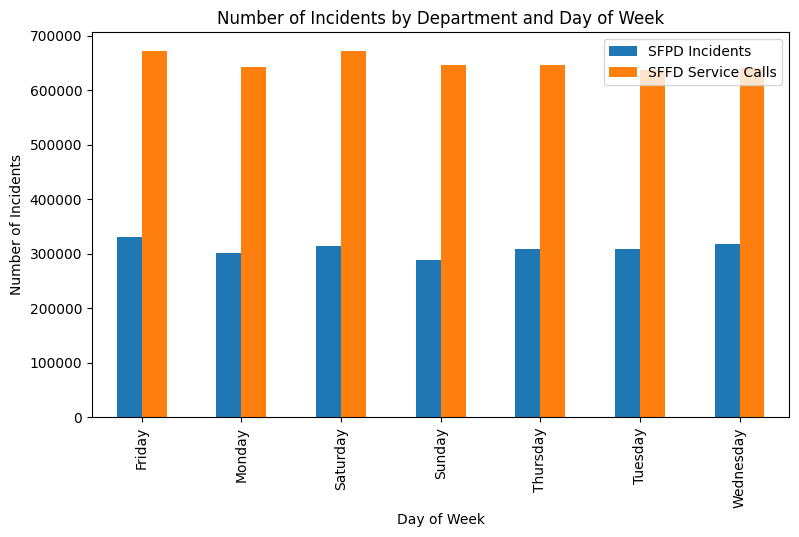

In [ ]:
QUERY = ("""WITH sfpd_incidents_counts AS (
  SELECT
    dayofweek AS day_of_week,
    COUNT(*) AS sfpd_incidents_count
  FROM `bigquery-public-data.san_francisco.sfpd_incidents`
  GROUP BY day_of_week
),
sffd_service_calls_counts AS (
  SELECT
    CASE
      WHEN day_of_week = 1 THEN 'Sunday'
      WHEN day_of_week = 2 THEN 'Monday'
      WHEN day_of_week = 3 THEN 'Tuesday'
      WHEN day_of_week = 4 THEN 'Wednesday'
      WHEN day_of_week = 5 THEN 'Thursday'
      WHEN day_of_week = 6 THEN 'Friday'
      WHEN day_of_week = 7 THEN 'Saturday'
    END AS day_of_week_name,
    COUNT(*) AS sffd_service_calls_count
  FROM (
    SELECT
      EXTRACT(DAYOFWEEK FROM call_date) AS day_of_week
    FROM
      `bigquery-public-data.san_francisco.sffd_service_calls`
  ) day_of_week_calls
  GROUP BY day_of_week_name
)
SELECT
  service.day_of_week,
  service.sfpd_incidents_count,
  call.sffd_service_calls_count
FROM sfpd_incidents_counts service
FULL OUTER JOIN sffd_service_calls_counts call
ON service.day_of_week = call.day_of_week_name
ORDER BY service.day_of_week;
    """.format(san_fan_pd_incidents))
query_job_2c = client.query(QUERY)  # API request
results_2c = query_job_2c.result()  # Waits for query to finish
df = results_2c.to_dataframe()
ax = df.plot(kind='bar', x='day_of_week', figsize=(9, 5))
ax.set_title('Number of Incidents by Department and Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Incidents')
ax.legend(["SFPD Incidents", "SFFD Service Calls"])
plt.pyplot.show()
